In [22]:
import keras
from keras.layers import Embedding, Dense
from keras.models import Sequential
import jieba
import json
from matplotlib import pyplot as plt
import numpy as np

#### 数据预处理
生成词频表

In [14]:
def preprocess(filename, data_dir, limit=500, start=0, record_length=50, args=[None, None, None, None]):
    words = args[0] or []
    word2id = args[1] or {}
    word_freq = args[2] or {}
    lengths = args[3] or []
    with open(data_dir+filename) as f:
        i = 0
        while True:
            i += 1
            line = f.readline()
            if i <= start:
                continue
            if not line:
                break
            j = json.loads(line)
            content = j["content"]
            for word in jieba.cut(content):
                if word in words:
                    word_freq[word] += 1
                    continue
                word2id[word] = len(words)
                words.append(word)
                word_freq[word] = 1
            if i % 100 == 0:
                print(i)
            if i % record_length == 0:
                lengths.append(len(words))
            if i >= limit:
                break
    return words, word2id, word_freq, lengths


In [9]:
words, word2id, word_freq, lengths = preprocess("news2016zh_train.json", r"D:\Data\new2016zh\\", 1500)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


In [29]:
words, word2id, word_freq, lengths = preprocess("news2016zh_train.json", r"D:\Data\new2016zh\\", 6000, 3000, args=[words, word2id, word_freq, lengths])

3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


173199 120


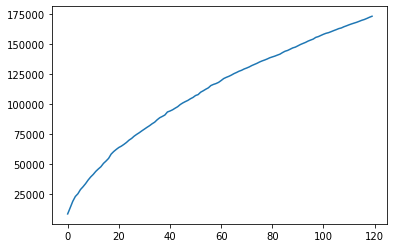

In [30]:
print(len(words), len(lengths))
plt.plot(range(len(lengths)), lengths)

print(word_freq)

In [31]:
def filter(word_freq, threshold=5):
    new_word_freq = {}
    for key, val in word_freq.items():
        if val < threshold:
            continue
        new_word_freq[key] = val
    return new_word_freq
filted = filter(word_freq)
len(filted)

45486

#### 保存数据到npy

In [32]:
np.save("word_freq", word_freq)

In [33]:
print(filted)

{'英国': 546, '石油': 248, '天然气': 191, '投资': 3797, '公司': 5032, '(': 4956, ')': 5071, '9': 2110, '日': 6183, '说': 6177, '，': 287906, '英格兰': 28, '南部': 102, '探测': 62, '到': 7864, '规模': 683, '巨大': 408, '的': 178351, '油田': 36, '储量': 6, '或许': 315, '高达': 217, '1000': 359, '亿桶': 12, '。': 115758, '这家': 207, '首席': 189, '执行官': 33, '史蒂芬': 8, '·': 1977, '当天': 364, '在': 36205, '接受': 768, '媒体': 999, '采访': 437, '时': 4354, '表示': 2601, '该': 1917, '认为': 2009, '地区': 1002, '巨量': 10, '石油资源': 7, '500': 498, '之间': 908, '是': 32546, '过去': 711, '30': 1913, '年来': 78, '发现': 2011, '最大': 1335, '陆上': 13, '这': 6824, '可是': 532, '一个': 8230, '惊人': 73, '数字': 409, '要': 7028, '知道': 1940, '苏格兰': 20, '北海': 28, '所有': 1316, '40': 653, '年': 9894, '总产量': 5, '也': 15309, '只有': 1295, '450': 27, '预计': 620, '这些': 2382, '地下': 126, '储存': 48, '深度': 266, '2500': 46, '英尺': 21, '至': 1572, '3000': 253, '米': 659, '其中': 1892, '可以': 6831, '开发': 763, '比例': 668, '为': 10659, '5%': 137, '15%': 98, '意味着': 371, '2030': 61, '这一': 527, '产量': 190, '将': 8879, '